In [9]:
# Import section

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import mendeleev as tp

In [76]:
# Data import section

data = pd.read_excel('DENS2RI.xlsx',sheet_name='DATA', index_col=0)
mass_acryl = 128.17
mass_mma = 100.13
ref_index_acryl = 1.41425
ref_index_mma = 1.41075


In [54]:
data

,DENSIDAD_1,DENSIDAD_2,DENSIDAD_M,W_B,W_A,MOL-A,MOL-B,N_A,N_B,IR_1,IR_2,IR_M
MUESTRA,,,,,,,,,,,,
0,0.9330,0.9330,0.93300,100.130,0.000,0.000000,1.000000,0.000000,1.000000,1.4105,1.4110,1.41075
1,0.9250,0.9200,0.92250,4.237,29.354,0.033058,0.293159,0.101337,0.898663,1.4110,1.4105,1.41075
2,0.9184,0.9098,0.91410,8.254,25.748,0.064399,0.257146,0.200280,0.799720,1.4110,1.4115,1.41125
3,0.9108,0.9158,0.91330,5.993,10.855,0.046758,0.108409,0.301341,0.698659,1.4115,1.4115,1.41150
4,0.9028,0.9036,0.90320,11.592,13.477,0.090442,0.134595,0.401899,0.598101,1.4120,1.4120,1.41200
5,0.8864,0.8880,0.88720,8.848,7.309,0.069033,0.072995,0.486053,0.513947,1.4125,1.4125,1.41250
6,0.8870,0.8876,0.88730,13.794,7.336,0.107623,0.073265,0.594970,0.405030,1.4130,1.4130,1.41300
7,0.8816,0.8799,0.88075,12.071,4.329,0.094180,0.043234,0.685374,0.314626,1.4130,1.4130,1.41300
8,0.8750,0.8790,0.87700,9.005,1.771,0.070258,0.017687,0.798886,0.201114,1.4135,1.4135,1.41350


In [77]:
# Data refination

dens_mix = np.array(data['DENSIDAD_M'][0:11])

mol_acryl = np.array(data['MOL-A'][0:11])

mol_mma = np.array(data['MOL-B'][0:11])

prop_acryl = np.array(data['N_A'][0:11])

prop_mma = np.array(data['N_B'][0:11])

ref_index_mix =  np.array(data['IR_M'][0:11])

dens_acryl = dens_mix[-1]

dens_mma = dens_mix[0]


In [117]:
# Deviation from the refractive index is tested
def ref_index_dev(prop_1, ref_index_mix, ref_index_1, ref_index_2):
    return ref_index_mix-(prop_1*ref_index_1+(1-prop_1)*ref_index_2)

# Volume in excess for the mixture is tested
def vol_excess(propa, dens):
    return propa*mass_acryl*(1/dens - 1/dens_acryl) + (1-propa)*mass_mma*(1/dens - 1/dens_mma)

def LorentzLorentz(n): # Where n is the refractive index
    return (n**2-1)/(n**2+2)

def DaleGladstone(n):
    return n-1

def Eykman(n):
    return (n**2-1)/(n+0.4)

def AragoBiot(n):
    return n

def newton(n):
    return n**2-1

def oster(n):
    return (n**2-1)*(2*n**2+1)/(n**2)

def ref_index_function(n):
    return [LorentzLorentz(n), DaleGladstone(n), Eykman(n), AragoBiot(n), newton(n), oster(n)]



In [118]:
vole = vol_excess(prop_acryl, dens_mix)

rie = ref_index_dev(prop_acryl, ref_index_mix, ref_index_acryl, ref_index_mma)

refif = ref_index_function(ref_index_mix)

In [120]:
refif[5]

array([2.47797299, 2.47797299, 2.48115096, 2.48274018, 2.48591909,
       2.48909862, 2.49227878, 2.49227878, 2.49545955, 2.49864095,
       2.50023189])

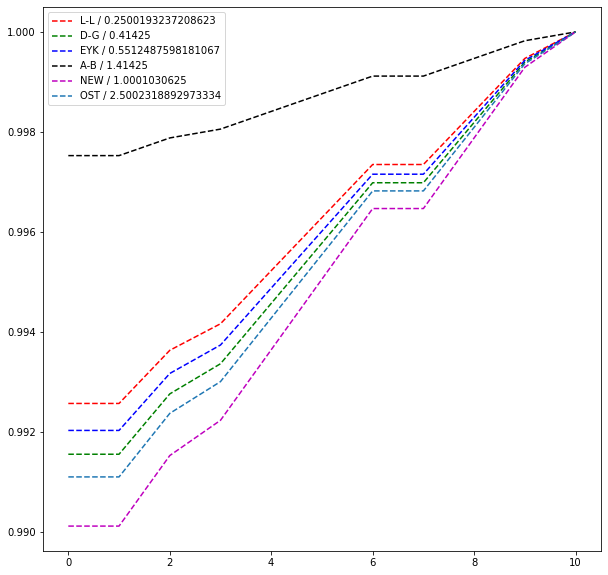

In [128]:
plt.figure(figsize=[10,10])

plt.plot(refif[0]/max(refif[0]), '--r', label = 'L-L / '+str(max(refif[0])))
plt.plot(refif[1]/max(refif[1]), '--g', label = 'D-G / '+str(max(refif[1])))
plt.plot(refif[2]/max(refif[2]), '--b', label = 'EYK / '+str(max(refif[2])))
plt.plot(refif[3]/max(refif[3]), '--k', label = 'A-B / '+str(max(refif[3])))
plt.plot(refif[4]/max(refif[4]), '--m', label = 'NEW / '+str(max(refif[4])))
plt.plot(refif[5]/max(refif[5]), '--', label = 'OST / '+str(max(refif[5])))

plt.legend()